# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# 3 observable trends based on the data analysis below
    # 1) As shown in the latitude vs. temperature plot, higher latitudes, especially those > 40 degrees are colder than those closer to the equator.
    # 2) There does not appear to be any clear relationship between latitude and cloudiness.
    # 3) As shown in the latitude vs. wind speed plot, outliers (very high winds) appear more likely to occur at extreme latitudes (far north or far south). However, additional data/sampling is recommended before concluding this is true definitively.

In [111]:
# Code below in this cell provided as starter code
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import csv
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [112]:
# Code below in this cell provided as starter code
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [113]:
# Per Weather API documentation, use the URL structure below...
# api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}&units=imperial
# ^Need to switch from standard units to imperial as well

url = "http://api.openweathermap.org/data/2.5/weather"
    
url_w_units_api = url + "?units=imperial&appid=" + weather_api_key 

# Define lists of weather related data to retieve via calls
temp = []
city_names = []
lat = []
long = []
cloud = []
wind = []
humidity = []
date = []
country = []

print("---------------")
print("Beginning Data Retrieval")
print("---------------")

city_counter = 0

# Structure query URL based on API documentation
for city in cities:
    query_url = url_w_units_api + "&q=" + city
    response = requests.get(query_url)
    
    # print(query_url)
    
    # Need to account for handful of city not found 404 errors below in append
    if response.status_code != 404:
    
    # append all lists - looked at example url http://api.openweathermap.org/data/2.5/weather?q=london&appid=ecfdfe218ded7750b5efdda70abe2d18 to structure append mapping
        response = response.json()
        temp.append(response["main"]["temp_max"])
        city_names.append(city)
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        humidity.append(response["main"]["humidity"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        
        print("Processing Record " + str(city_counter) + " | " + city)
        
        city_counter = city_counter + 1
        
    else: print("City Not Found")
                
print("---------------")

---------------
Beginning Data Retrieval
---------------
Processing Record 0 | sumenep
Processing Record 1 | kavieng
Processing Record 2 | east london
Processing Record 3 | aksarka
Processing Record 4 | atuona
Processing Record 5 | kletskaya
Processing Record 6 | mengcheng
Processing Record 7 | rangia
City Not Found
City Not Found
Processing Record 8 | borogontsy
Processing Record 9 | avarua
Processing Record 10 | busselton
Processing Record 11 | severo-kurilsk
Processing Record 12 | hermanus
Processing Record 13 | faya
Processing Record 14 | yellowknife
Processing Record 15 | ahuimanu
Processing Record 16 | kruisfontein
Processing Record 17 | mizdah
Processing Record 18 | albany
Processing Record 19 | vaini
Processing Record 20 | new norfolk
Processing Record 21 | ulkan
Processing Record 22 | fare
Processing Record 23 | ancud
Processing Record 24 | punta arenas
Processing Record 25 | lebu
Processing Record 26 | cape town
Processing Record 27 | rikitea
Processing Record 28 | makakilo c

Processing Record 238 | bengkulu
City Not Found
Processing Record 239 | kunya
Processing Record 240 | alofi
Processing Record 241 | dunedin
Processing Record 242 | sao filipe
Processing Record 243 | hay river
Processing Record 244 | ahipara
Processing Record 245 | bissora
Processing Record 246 | birao
Processing Record 247 | saint-ambroise
Processing Record 248 | cam ranh
Processing Record 249 | mount isa
Processing Record 250 | baherden
Processing Record 251 | port blair
Processing Record 252 | marsa matruh
Processing Record 253 | sterling
Processing Record 254 | lardos
Processing Record 255 | williston
City Not Found
Processing Record 256 | victoria
Processing Record 257 | tessalit
Processing Record 258 | cruzeiro do sul
Processing Record 259 | bacalar
Processing Record 260 | lorengau
Processing Record 261 | leningradskiy
City Not Found
Processing Record 262 | shingu
Processing Record 263 | atasu
Processing Record 264 | butaritari
Processing Record 265 | holme
Processing Record 266 |

Processing Record 476 | salinopolis
Processing Record 477 | ontario
Processing Record 478 | neyshabur
Processing Record 479 | valenca
Processing Record 480 | mutoko
Processing Record 481 | nemuro
Processing Record 482 | saint-paul
Processing Record 483 | villa carlos paz
Processing Record 484 | tigil
Processing Record 485 | imst
Processing Record 486 | maamba
Processing Record 487 | tiarei
Processing Record 488 | charyshskoye
Processing Record 489 | mapiri
Processing Record 490 | kutum
City Not Found
Processing Record 491 | byron bay
Processing Record 492 | tshikapa
Processing Record 493 | wyndham
Processing Record 494 | gazojak
Processing Record 495 | port keats
Processing Record 496 | ponta delgada
Processing Record 497 | moerai
Processing Record 498 | san patricio
Processing Record 499 | havelock
Processing Record 500 | cuenca
Processing Record 501 | dzerzhinsk
Processing Record 502 | caluquembe
Processing Record 503 | trincomalee
Processing Record 504 | buala
Processing Record 505 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [114]:
# Put the data into a dataframe
weather_df = pd.DataFrame({"City": city_names, "Lat": lat, "Lng": long, "Max Temp": temp, "Humidity": humidity, "Cloudiness": cloud, "Wind Speed": wind, "Country": country, "Date": date})
weather_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sumenep,-7.02,113.87,76.41,91,100,6.40,ID,1608151038
1,kavieng,-2.57,150.80,83.50,76,100,8.99,PG,1608151247
2,east london,-33.02,27.91,68.34,80,0,11.16,ZA,1608151090
3,aksarka,66.56,67.80,5.00,94,100,14.81,RU,1608151247
4,atuona,-9.80,-139.03,78.89,78,1,18.23,PF,1608151248
5,kletskaya,49.31,43.06,23.00,85,1,1.99,RU,1608151248
6,mengcheng,33.26,116.57,29.88,80,14,3.87,CN,1608151248
7,rangia,26.47,91.63,62.01,74,13,2.59,IN,1608151248
8,borogontsy,62.67,131.17,-45.35,78,69,1.39,RU,1608151248
9,avarua,-21.21,-159.78,82.40,83,100,17.22,CK,1608151248


In [115]:
# Write to csv
weather_df.to_csv("cities.csv", index=False, header=True)

In [116]:
# Use describe to summarize the stats below
weather_df_stats = weather_df[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Date"]].describe()
weather_df_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,539.00000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02
mean,20.00295,14.669091,50.446735,74.755102,57.580705,8.693748,1.608151e+09
std,33.92425,90.833797,30.460547,19.505870,39.132585,6.184981,7.326249e+01
min,-54.80000,-179.170000,-45.350000,1.000000,0.000000,0.070000,1.608151e+09
25%,-8.27000,-65.945000,30.955000,69.000000,20.000000,3.955000,1.608151e+09
50%,26.12000,16.430000,59.040000,80.000000,75.000000,7.470000,1.608151e+09
75%,48.26500,95.330000,76.305000,88.000000,95.000000,11.410000,1.608151e+09
max,78.22000,179.320000,93.600000,100.000000,100.000000,40.260000,1.608151e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [117]:
# max is 100, so skip

In [118]:
#  Get the indices of cities that have humidity over 100%.
# none over 100%, so skip

In [119]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# none over 100%, so skip

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

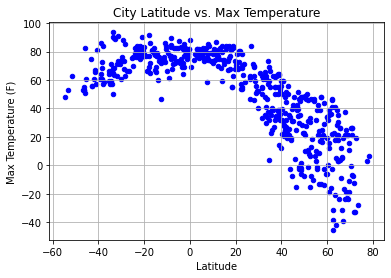

In [120]:
weather_df.plot(kind = "scatter", x = "Lat", y = "Max Temp", c = "Blue")

# formatting, titles, etc.
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")

# save as PNG
plt.savefig("Lat_vs_MaxTemp.png")

# the code above is plotting latitude values from our dataframe against max temp values from our dataframe on a scatterplot, aiding in identifying any relationship(s) between the variables.

## Latitude vs. Humidity Plot

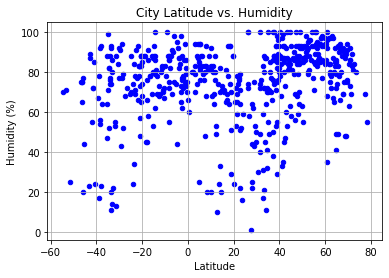

In [121]:
weather_df.plot(kind = "scatter", x = "Lat", y = "Humidity", c = "Blue")

# formatting, titles, etc.
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")

# save as PNG
plt.savefig("Lat_vs_Humidity.png")

# the code above is plotting latitude values from our dataframe against humidity values from our dataframe on a scatterplot, aiding in identifying any relationship(s) between the variables.

## Latitude vs. Cloudiness Plot

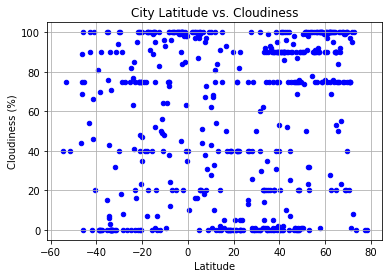

In [122]:
weather_df.plot(kind = "scatter", x = "Lat", y = "Cloudiness", c = "Blue")

# formatting, titles, etc.
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

# save as PNG
plt.savefig("Lat_vs_Cloud.png")

# the code above is plotting latitude values from our dataframe against cloudiness values from our dataframe on a scatterplot, aiding in identifying any relationship(s) between the variables.

## Latitude vs. Wind Speed Plot

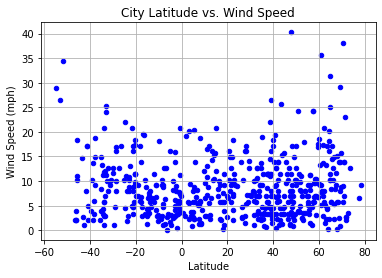

In [123]:
weather_df.plot(kind = "scatter", x = "Lat", y = "Wind Speed", c = "Blue")

# formatting, titles, etc.
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")

# save as PNG
plt.savefig("Lat_vs_Wind.png")

# the code above is plotting latitude values from our dataframe against wind speed values from our dataframe on a scatterplot, aiding in identifying any relationship(s) between the variables.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.5679360503344757


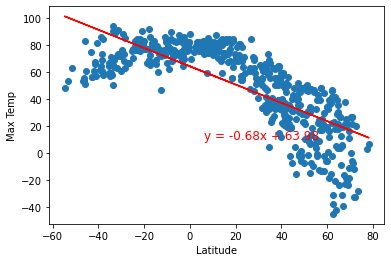

In [136]:
#NOTE BELOW I WAS UNABLE TO SEPERATE BY HEMISPHERE WITHOUT GETTING ERRORS. Tried to find a working solution, but nothing seemed to work.

x_values = weather_df["Lat"]

# if int(x_values) > 0
y_values = weather_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

# Although my plot and regression line account for the other hemisphere as well, I see in the N Hemisphere that temps tend to drop as latitude increases. R^2 is above .5, so this is a pretty clear trend.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.5679360503344757


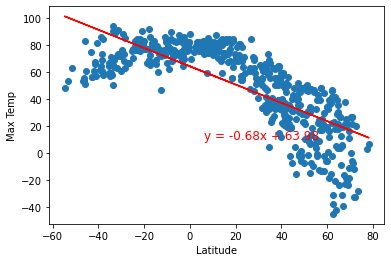

In [129]:
#NOTE BELOW I WAS UNABLE TO SEPERATE BY HEMISPHERE WITHOUT GETTING ERRORS. Tried to find a working solution, but nothing seemed to work.

x_values = weather_df["Lat"]

#if int(x_values) < 0
y_values = weather_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

# Although my plot and regression line account for the other hemisphere as well, I see in the S Hemisphere that temps tend to drop slightly as latitude decreases. It is not as noticeable as in the N Hemisphere though.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.045468683627642156


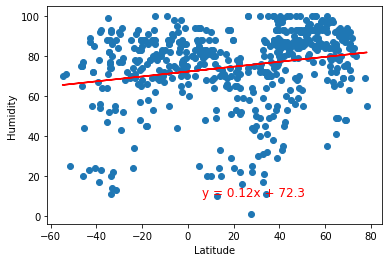

In [130]:
#NOTE BELOW I WAS UNABLE TO SEPERATE BY HEMISPHERE WITHOUT GETTING ERRORS. Tried to find a working solution, but nothing seemed to work.

x_values = weather_df["Lat"]

#if int(x_values) > 0
y_values = weather_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

# I do not see any obvious relationships between latitude and humidity based on the below.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.045468683627642156


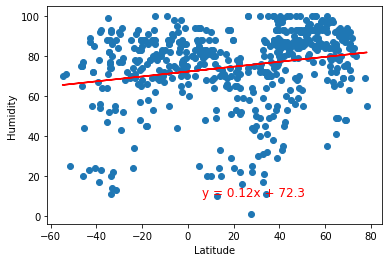

In [131]:
#NOTE BELOW I WAS UNABLE TO SEPERATE BY HEMISPHERE WITHOUT GETTING ERRORS. Tried to find a working solution, but nothing seemed to work.

x_values = weather_df["Lat"]

#if int(x_values) < 0
y_values = weather_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

# I do not see any obvious relationships between latitude and humidity based on the below.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.024162847915958283


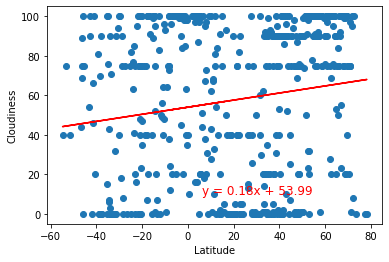

In [132]:
#NOTE BELOW I WAS UNABLE TO SEPERATE BY HEMISPHERE WITHOUT GETTING ERRORS. Tried to find a working solution, but nothing seemed to work.

x_values = weather_df["Lat"]

#if int(x_values) > 0
y_values = weather_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

# I do not see any obvious relationships between latitude and cloudiness based on the below.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.024162847915958283


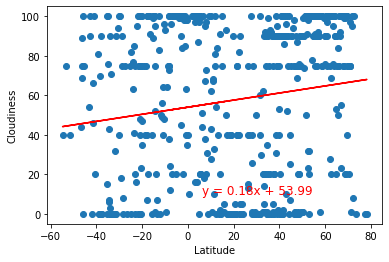

In [133]:
#NOTE BELOW I WAS UNABLE TO SEPERATE BY HEMISPHERE WITHOUT GETTING ERRORS. Tried to find a working solution, but nothing seemed to work.

x_values = weather_df["Lat"]

#if int(x_values) < 0
y_values = weather_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

# I do not see any obvious relationships between latitude and cloudiness based on the below.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.00037002747601911777


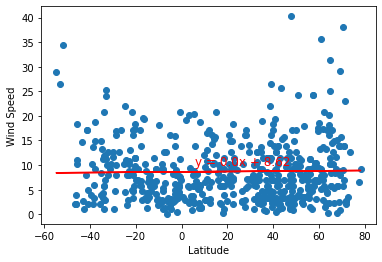

In [134]:
#NOTE BELOW I WAS UNABLE TO SEPERATE BY HEMISPHERE WITHOUT GETTING ERRORS. Tried to find a working solution, but nothing seemed to work.

x_values = weather_df["Lat"]

#if int(x_values) > 0
y_values = weather_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

# I do not see any obvious relationships between latitude and wind speed based on the below. However, outliers (high winds) appear to be more frequent at extreme latitudes.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.00037002747601911777


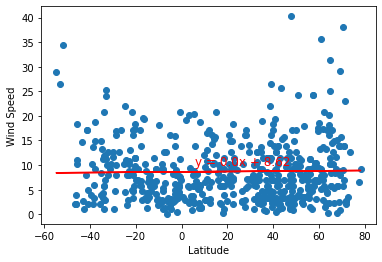

In [135]:
#NOTE BELOW I WAS UNABLE TO SEPERATE BY HEMISPHERE WITHOUT GETTING ERRORS. Tried to find a working solution, but nothing seemed to work.

x_values = weather_df["Lat"]

#if int(x_values) < 0
y_values = weather_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-squared value is: {rvalue**2}")
plt.show()

# I do not see any obvious relationships between latitude and wind speed based on the below. However, outliers (high winds) appear to be more frequent at extreme latitudes.